In [1]:
import numpy as np
import pylab as plt
from scipy.optimize import curve_fit
import scipy as sp
from scipy import stats
import pandas as pd
%matplotlib inline

#SI NO LLEGAN A CORRER LOS GRAFICOS, COMETAR LAS SIGUIENTES 2 LÍNEAS.
import seaborn as sns
sns.set()

## Problema 1

Metodo de Monte Carlo. Para generar números pseudoaleatorios con una distribución arbitraria $f(t)$, en un dominio $[a,b]$ en el que $f$ está acotada (siendo $f_{m}$ su valor máximo) se puede proceder de la siguiente manera:


I. Se generan dos números al azar $y$ y $z$ con distribución uniforme en $[0,1]$.<br>
II.  A partir de $y$ y $z$ se determinan $u=a+ (b−a)y$ y $v=f_{m}z$.<br>
III. Si $v\leq f(u)$, se incluye $x=u$ en la muestra de números generados, en otro caso se descarta.<br>
IV. Se repiten los pasos I-III hasta obtener la cantidad deseada de números aceptados.<br>

__(1)__ Utilizando el resultado del problema $5$ de la guía $3$, genere con la computadora $10000$ números al azar que sigan la distribución de Cauchy a partir de una uniforme $[0,1]$. Presente los datos en un histograma y grafique sobre estos la predicción teórica.

El problema mencionado, consta de una varilla cuyo centro está en la posición $(-a,b)$ respecto al origen, con $a\geq 0$. Se hace girar libremente la varilla hasta que queda quieta, formando un ángulo $\theta$ con la horizontal. Después de $m$ realizaciones del experimento, se analiza la distribución de una nueva variable (a la que llamaré __y__) definida como la altura en la cual la dirección de la varilla corta al eje vertical $\hat{y}$.<br>
Se puede demostrar que la variable __y__ sigue una distribución de Cauchy dada por la expresión:<br><br>
$$f_{Y}(y)=\frac{1}{\pi}\frac{a}{a^{2}+(y-b)^{2}}$$

In [2]:
def f_Cauchy(t,a,b):
    p=a/(np.pi*(a**2+(t-b)**2))
    return(p)

En primer lugar se simula la variable aleatoria $\theta \in [-\frac{\pi}{2},\frac{\pi}{2}]$ partir de una uniforme en [0,1]. 

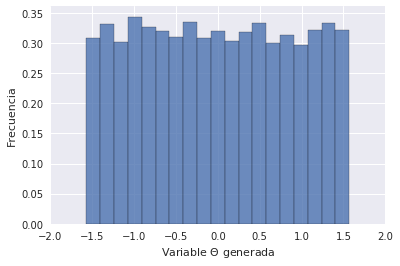

In [3]:
m=10000
x=np.random.random(m)
tita=np.pi*x-np.pi/2
plt.hist(tita,bins=np.linspace(-np.pi/2,np.pi/2,20),density=True,edgecolor='black',alpha=0.8);
plt.xlabel('Variable $\Theta$ generada');
plt.ylabel('Frecuencia');
plt.xlim(-2,2);

Por cómo se definió la variable aleatoria __y__, se tiene $y=a .tan(\theta)+b$. El objetivo es simular cuál será la distribución de la variable __y__ así definida, y compararla con la distribución teórica esperada.

In [4]:
a=1
b=0
y=a*np.tan(tita)+b

#predicción teórica
t=np.linspace(b-120*a,b+120*a,801)
t_cont=np.linspace(b-120*a,b+120*a,10000)
f=f_Cauchy(t,a,b)
f_cont=f_Cauchy(t_cont,a,b)

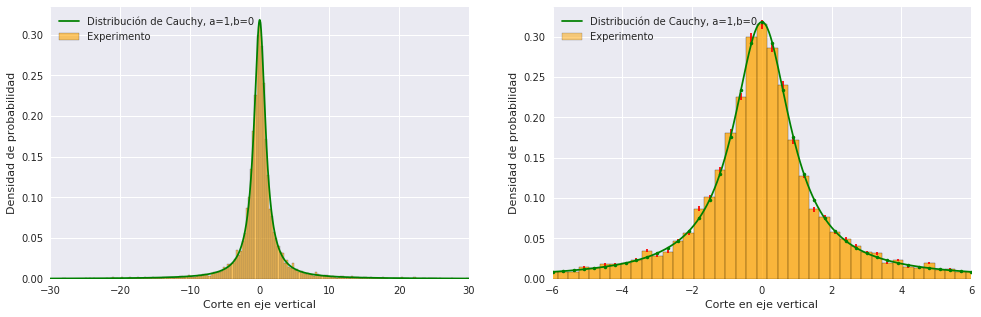

In [5]:
plt.figure(figsize=(16.5,5))
plt.subplot(1,2,1)
plt.hist(y,bins=t+np.diff(t)[0]/2,density=True,edgecolor='black',color='orange',alpha=0.6,label='Experimento');
plt.xlabel('Corte en eje vertical');
plt.plot(t_cont,f_cont,'g',label='Distribución de Cauchy, a={},b={}'.format(a,b))
plt.ylabel('Densidad de probabilidad');
plt.xlim(b-30*a,b+30*a);
plt.legend(loc='upper left');

plt.subplot(1,2,2)
n, bins, patches=plt.hist(y,bins=t+np.diff(t)[0]/2,density=True,edgecolor='black',color='orange',alpha=0.5);
plt.bar(x=t[1:], height=n, width=np.diff(bins), yerr=np.sqrt(n/m), edgecolor='black', ecolor="red",color='orange',alpha=0.5 ,capsize=2,label='Experimento')
plt.xlabel('Corte en eje vertical');
plt.ylabel('Densidad de probabilidad');
plt.plot(t,f,'g.')
plt.plot(t_cont,f_cont,'g',label='Distribución de Cauchy, a={},b={}'.format(a,b))
plt.xlim(b-a*6,b+a*6);
plt.legend(loc='upper left');

Los gráficos muestran la misma información en distintas escalas. En el segundo se puede apreciar que la simulación verifica la predicción teeórica. Es importante que en este trabajo, se utiliza la expresión "verifica" en un sentido cualitativo. Lo correcto sería hacer un test de hipótesis para analizar cúan consistentes son los resultados con la predicción teórica, análisis que no se hará. Consideraré que se verifica la predicción si no se aprecia a simple vista grandes diferencias entre el modelo y la simulación.<br>
Se puede también ver que modificando los parámetros $a$ y $b$, se tienen resultados análogos.

Con respecto al error que se le asignó a cada bin tanto en este histograma como en los que siguen, se tuvo un mismo criterio. La probabilidad de un evento "caiga" en un determinado bin es un parametro fijo a lo largo de todo un experimento. Además hay muchos bins en donde el evento puede caer. En ese sentido puede pensarse como una serie de n experiencias de Bernoulli. La probabilidad de caer en un bin es muy chica, pero la cantidad de realizaciones N es muy grande (N->$\infty$) por lo que la distribución que se espera para el número de datos en un bin (n) es de Poisson. Más aún, esta distribución es independiente de cuál sea la distribución de mi variable aleatoria original.<br>
Esto nos permite estimar la incerteza como la raiz de la cantidad de eventos que se registraron. Esta metodología funciona cuando la cantidad de evntos en los bins es grande, pero empieza a fallar para números chicos, e incluso cuando no se miden eventos en un bin, se tiene error nulo, lo cual es absolutamente incorrecto.<br>

La manera rigurosa de calcular el error sería dar el intervalo de confianza dado el resultado que se obtuvo. Es decir, considerando que la cantidad de eventos en el bin tiene distribución de Poisson, en qué intervalo esperaría que el 68% de las veces se encuentre el valor real de eventos que deberían caer en ese bin dado que medí una determinada cantidad de eventos en la simulación.<br>

Sin embargo, para los histogramas que analizaremos, se tienen suficientes eventos en cada bin como para poder utilizar la estimación.

__(2)__ Repita el ítem anterior pero ahora usando el Método Monte Carlo (conocido como aceptación-rechazo).

A partir de la metodología descripta al inicio del problema, se eligió una cantidad lo suficientemente grande de números al azar como para que el número de ellos que fuera aceptada en la aceptación-rechazo fuera similar a la cantidad de experimentos realizados en el inciso anterior ($n_{acep.}\sim$10000)

In [6]:
Y=np.random.random(200000)
Z=np.random.random(200000)
f_m=f_Cauchy(b,a,b)


In [7]:
c=b-50*a
d=b+50*a
U=c+(d-c)*Y
V=f_m*Z

In [8]:
X=U[V<=f_Cauchy(U,a,b)]
M=len(X)

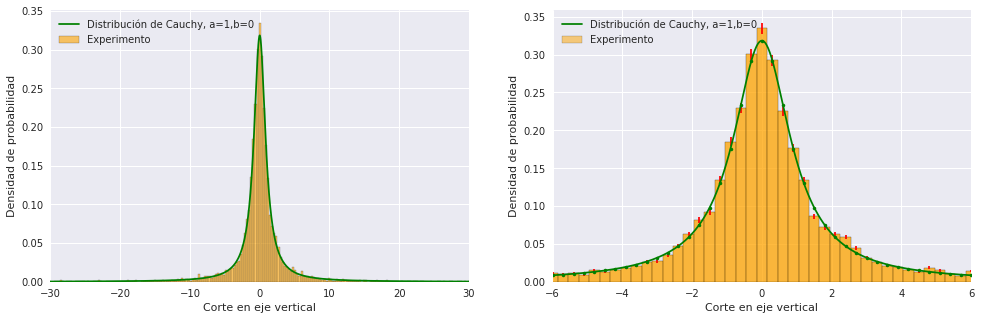

In [9]:
plt.figure(figsize=(16.5,5))
plt.subplot(1,2,1)
plt.hist(X,bins=t+np.diff(t)[0]/2,density=True,edgecolor='black',color='orange',alpha=0.6,label='Experimento');
plt.xlabel('Corte en eje vertical');
plt.plot(t_cont,f_cont,'g',label='Distribución de Cauchy, a={},b={}'.format(a,b))
plt.ylabel('Densidad de probabilidad');
plt.xlim(b-30*a,b+30*a);
plt.legend(loc='upper left');

plt.subplot(1,2,2)
N, Bins, Patches=plt.hist(X,bins=t+np.diff(t)[0]/2,density=True,edgecolor='black',color='orange',alpha=0.5);
plt.bar(x=t[1:], height=N, width=np.diff(Bins), yerr=np.sqrt(N/M), edgecolor='black', ecolor="red",color='orange',alpha=0.5, capsize=2,label='Experimento')
plt.xlabel('Corte en eje vertical');
plt.ylabel('Densidad de probabilidad');
plt.plot(t,f,'g.')
plt.plot(t_cont,f_cont,'g',label='Distribución de Cauchy, a={},b={}'.format(a,b))
plt.xlim(b-6*a,b+6*a);
plt.legend(loc='upper left');

Al igual que en el caso anterior, l gráficos muestran la misma información en distintas escalas, y se puede apreciar que la simulación verifica la predicción teórica. Se puede también ver que modificando los parámetros $a$ y $b$ o $c$ y $d$, se tienen resultados análogos.

__(3)__ Discuta los pros y contras de cada método.

El primer método tiene la ventaja de que haciendo un simple cambio de variables (aplicación de la función tangente en este caso) a una variable aleatoria con distribución uniforme, se obtiene directamente la densidad de probabilidad deseada. Para los casos en donde se tiene expresión analítica de la inversa de la primitica de la distribución que se desea simular, resulta ser un método muy eficiente. Además, con este método, la nueva variable aleatoria podrá tomar cualquier valor posible de su dominio.<br>
Por el contrario, cuando no se conoce la expresión analítica de la densidad de probabilidad que se desea simular, o no es posible invertir su primitiva (si es que está definida), resulta mucho más conveniente utilizar el método de Montecarlo. A pesar de que se tiene que generar al menos un orden de magnitud más de números aleatorios (lo que puede hacer que tarde más tiempo) para alcanzar un nivel de incerteza similar en la altura de los bins al método anterior, el único dato que se requiere a priori es conocer cuánto vale la densidad de probabilidad en el rango que se quiere simular. No es necesario una expresión analítica para la densidad $f$, sino su evaluación en los $x\in[c,d]$. Además, las operaciones involucradas en Montecarlo de aceptación-rechazo son lineales (suma y multiplicación) que son de costo casi nulo desde el punto de visto computacional.<br>
En este caso en particular, se desea simular la distribución de Cauchy. Dado que la varianza no está definida (ya que la integral diverge), se tiene que el rango de valores en los que se encuentra la variable aleatoria $y$ generada con el primer método puede hacerse excesivamente grande; y, al hacer el histograma, si éste se realiza sobre un rango mucho menor, se corre el riesgo de perder información, lo que llevaría a una normalización incorrecta. Lo mismo ocurre con el método montecarlo, es preciso tomar valores de $c$ y $d$ de manera que la probabilidad de que la variable aleatoria esté fuera del intervalo $[c,d]$ fuera lo suficientemente baja.

## Problema 2

__(1)__ Encuentre,  con  su  error,  los  parámetros  de  la  recta  que  mejor  ajusta  los  siguientes datos, con $\sigma= 0.3$. Grafique los datos, con su error, y la recta obtenida para $0\leq x\leq 5$.

Tenemos un set de datos $\{x_{i},y_{i}\pm\sigma_{i}\}$,donde los $\{x_{i}\}$ son independientes y sin incerteza; y queremos encontrar los parámetros que mejor ajustan los datos a $y=a_{1}+a_{2}x$. Se puede demostrar, que a partir de pedir máxima Verosimilitud, los parámetros que mejor ajustan cualquier función lineal en los parámetros cumplen la siguiente ecuación:
$$\underline{\hat{\theta}}=[A^{T}V^{-1}A]^{-1}A^{T}V^{-1}\underline{y}$$
donde $V$ es la matriz de covarianza de $\underline{y}$, y $A_{i,j}=g_{j}(x_{i})$ con $g_{j}$ el coeficiente que acompaña a cada parámetro ($f(x_{i}\mid\theta)=\sum_{j}\theta_{j}g_{j}(x_{i})$).<br>
Además, $M\equiv[A^{T}V^{-1}A]^{-1}$ resulta ser la matriz de covarianza de los parámetros $\underline{\theta}$.


Este método de estimación de los parámetros resulta conveniente ya que es sólo un problema matricial, que la computadora sabe resolver de manera rápida. A continuación, para los datos brindados, se definen los vectores __x__,__y__, las matrices __A__ y __V__, y se resuelve el problema. 

In [10]:
x=np.linspace(2,3,11).transpose()
y=np.array([2.78,3.29,3.29,3.33,3.23,3.69,3.46,3.87,3.62,3.4,3.99]).transpose()
sigma_y=0.3*np.ones(11)

In [11]:
V=0.3**2*np.identity(11)
f1=np.array(np.ones(11))
f2=np.array(x)
A_t=np.array([f1,f2])
A=A_t.transpose()
V_inv=np.linalg.inv(V)

In [12]:
a=np.matmul(np.matmul(np.linalg.inv(np.matmul(np.matmul(A_t,V_inv),A)),np.matmul(A_t,V_inv)),y)
a

array([1.45227273, 0.79909091])

In [13]:
cov_a=np.linalg.inv(np.matmul(np.matmul(A_t,V_inv),A))
cov_a

array([[ 0.51954545, -0.20454545],
       [-0.20454545,  0.08181818]])

Se aprecia que la matriz de covarianza de los parámetros no es diagonal, es decir que hay correlación no nula entre $a_{1}$ y $a_{2}$. Veremos más adelante algunas consecuencias que esto trae.

In [14]:
sigma_a=np.array([np.sqrt(cov_a[0,0]),np.sqrt(cov_a[1,1])])
sigma_a

array([0.72079502, 0.28603878])

Finalmente, se obtienen los parámetros $a_{1}=1.452\pm0.721$ y $a_{2}=0.799\pm0.286$

In [15]:
t=np.linspace(0,5,2)
fit=a[0]+a[1]*t

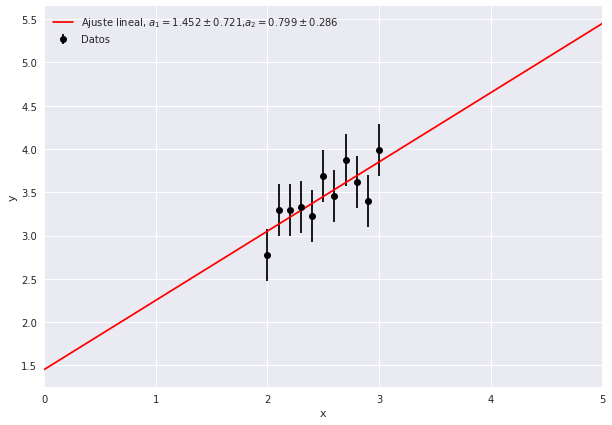

In [16]:
plt.figure(figsize=(10,7))
plt.errorbar(x,y,yerr=sigma_y,fmt='ok',label='Datos');
plt.plot(t,fit,'r',label='Ajuste lineal, $a_1={:.3f}\pm{:.3f}$,$a_2={:.3f}\pm{:.3f}$'.format(a[0],sigma_a[0],a[1],sigma_a[1]))
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5);
plt.legend(loc='upper left')

__(2)__ A partir de esta recta prediga, con su error, el valor esperado $y_{a}$ para un cierto $x_{a}$. No olvide usar la matriz de covarianza completa. Grafique $y_{a}(x_{a})$, y agréguelo al gráfico anterior en forma de banda de error. Encuentre qué valor de $x_{a}$ minimiza el error de $y_{a}$,e interprete la magnitud de este valor mínimo. Discuta por qué el error aumenta para valores de $x_{a}$ alejados de la región donde se hicieron las mediciones.

Para un $x_{a}$ arbitrario podemos predecir el valor de $y_{a}$ como $y_{a}=a_{1}+a_{2}x_{a}$  con los $a_{1}$ y $a_{2}$ antes estimados. Utilizando el método de propagación de errores, el error en la predicción de $y_{a}$ es $\sigma_{y_{a}}=\sqrt{M_{1,1}+x_{a}^{2}M_{2,2}+2x_{a}M_{1,2}}$, donde $M$ es la matriz de covarianza de los parámetros estimados. A continuación, se predice de este modo los $y_{a}$ para $0\leq x_{a}\leq 5$, y se grafica la banda de error como el intervalo $[y_{a}-\sigma_{a},y_{a}+\sigma_{a}] \forall x_{a}$

In [17]:
def prediccion(t,params,cov_params):
    Y=params[0]+params[1]*t
    sigma_Y=np.sqrt(cov_params[0,0]+t**2*cov_params[1,1]+2*t*cov_params[0,1])
    return(Y,sigma_Y)

In [18]:
xa=np.linspace(0,5,501)
I,sigma_I=prediccion(xa,a,cov_a)
banda_u=I+sigma_I
banda_l=I-sigma_I
    

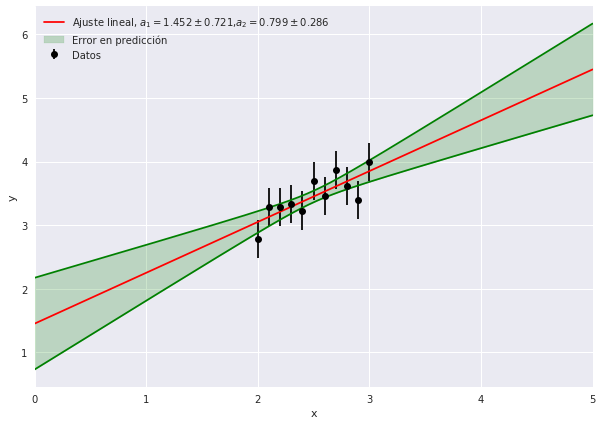

In [19]:
plt.figure(figsize=(10,7))
plt.errorbar(x,y,yerr=sigma_y,fmt='ok',label='Datos');
plt.plot(t,fit,'r',label='Ajuste lineal, $a_1={:.3f}\pm{:.3f}$,$a_2={:.3f}\pm{:.3f}$'.format(a[0],sigma_a[0],a[1],sigma_a[1]))
plt.plot(xa,banda_u,'g')
plt.plot(xa,banda_l,'g')
plt.fill_between(xa, banda_l, banda_u,color='green', alpha=0.2,label='Error en predicción')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5);
plt.legend(loc='upper left')

la manera analítica de calcular el valor de $x_{a}$ que minimiza el error en $y_{a}$ es minimizando la cantidad $\sigma_{y_{a}}$ definida por propagación de errores. Esto es lo mismo que resolver $2x_{a}M_{2,2}+2M_{1,2}=0$, es decir $x_{a}=-Cov(a_{1},a_{2})/\sigma_{a_{2}}^{2}$. Tiene sentido que éste $x_{a}$ no dependa del error $\sigma_{a_{1}}$ ya que modificar sólo la ordenada al origen (una traslación vertical de la recta), afecta a todos los x por igual.

In [20]:
-cov_a[0,1]/cov_a[1,1]

2.5000000000000004

El valor de $x_{a}$ que minimiza el error en $y_{a}$ es $x_{a}=2.5$. Este valor coincide con el promedio de los valores $\{x_{i}\}$ medidos. Más aún, es el valor de x en el cual la predicción de ese x da exactamente el promedio pesado de los $\{y_{i}\}$ medidos.

In [21]:
xa[sigma_I==min(sigma_I)],np.mean(x)

(array([2.5]), 2.5)

In [22]:
np.mean(y),prediccion(np.mean(x),a,cov_a)[0]

(3.45, 3.4500000000000095)

Reemplazando el valor obtenido en $\sigma_{y_{a}}$, se tiene $\sigma_{y_{a}min}=\sqrt{\sigma_{a_{1}}^{2}-(\frac{Cov(a_{1},a_{2})}{\sigma_{a_{2}}})^{2}}$

Al predecir valores de $y_{a}$ para $x_{a}$ alejados de la zona donde se realizaron las mediciones, se puede observar que los errores en esa predicción crecen. De manera intuitiva, se puede razonar que esto tiene sentido. Si por ejemplo la pendiente de la recta "real" subyacente fuera un poco más grande, la ordenada al origen debería ser un poco menor de manera de ajustar "bien" a los datos; como si la recta girara un pequeño ángulo alrededor del punto fijo en el promedio de los datos. Entonces, cuando uno va a predecir $y_{a}$ para $x_{a}$ muy grandes (a la derecha), se tiene que el ajuste se encuentra mucho más arriba que el anterior. Lo mismo ocurre cuando uno va a valores de $x_{a}$ mucho menores al promedio de la distribución de los datos. Es entonces aquí que se puede entender de manera más intuitiva el significado de la correlación entre $a_{1}$ y $a_{2}$. Da cuenta de cómo cambia el valor de uno de ellos si se modifica el valor del otro. Y tiene sentido que esto ocurra, ya que están intimamente relacionados: ambos desean que los datos queden bien ajustados por la combinación de éstos.<br>
En el caso de una recta con pendiente positiva, la correlación es negativa, lo que equivale a que cuando uno de los parámetros es perturbado a un mayor valor, el otro decrece. Como $Cov(a_{1},a_{2})<0$, entonces la contribución al error en la predicción de $y_{a}$, hace que el error decrezca en la zona donde están dispersos los datos.

__(3)__ Grafique la banda de error que obtiene si ignora el término de correlación en la propagación de errores y discuta por qué ésta es claramente errónea.

Utilizando el método de propagación de errores, pero ignorando el termino de correlación, el error en la predicción de $y_{a}$ es $\sigma_{y_{a}}=\sqrt{M_{1,1}+x_{a}^{2}M_{2,2}}=\sqrt{\sigma_{a_{1}}^2+(x_{a}\sigma_{a_{2}})^{2}}$

Antes de graficar las bandas de error se puede ver que éstas van a crecer en la medida que $\mid x_{a} \mid$ lo haga, independientemente de dónde estén distribuidos los datos.

In [23]:
def prediccion_sc(t,params,cov_params):
    Y=params[0]+params[1]*t
    sigma_Y=np.sqrt(cov_params[0,0]+t**2*cov_params[1,1])
    return(Y,sigma_Y)

In [24]:
Isc,sigma_Isc=prediccion_sc(xa,a,cov_a)
banda_u_sc=Isc+sigma_Isc
banda_l_sc=Isc-sigma_Isc
    

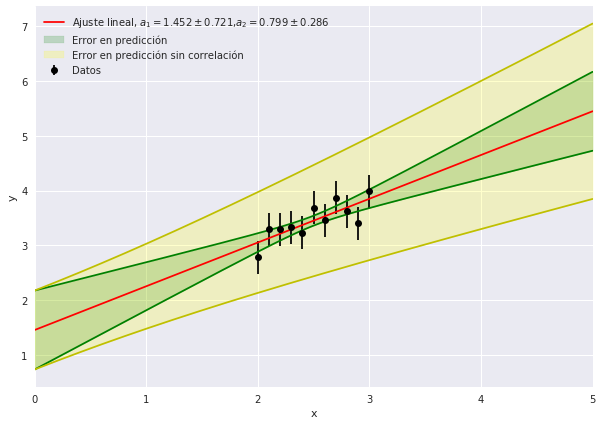

In [25]:
plt.figure(figsize=(10,7))
plt.errorbar(x,y,yerr=sigma_y,fmt='ok',label='Datos');
plt.plot(t,fit,'r',label='Ajuste lineal, $a_1={:.3f}\pm{:.3f}$,$a_2={:.3f}\pm{:.3f}$'.format(a[0],sigma_a[0],a[1],sigma_a[1]))
plt.plot(xa,banda_u,'g')
plt.plot(xa,banda_l,'g')
plt.fill_between(xa, banda_l, banda_u,color='green', alpha=0.2,label='Error en predicción')
plt.plot(xa,banda_u_sc,'y')
plt.plot(xa,banda_l_sc,'y')
plt.fill_between(xa, banda_l_sc, banda_u_sc, color='yellow', alpha=0.2,label='Error en predicción sin correlación')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(0,5);
plt.legend(loc='upper left')

El error que se comete en no incluir el término de correlación en la propagación de errores es asumir que se podría cambiar el valor de uno de los parámetros sin que el otro se vea afectado y que así y todo sigan siendo un "buen" ajuste a los datos. Por ende, se tendría que el error en la predicción viene como suma en  cuadratura de dos errores. Una contribución dada por el error en la ordenada al origen $\sigma_{a_{1}}$, y otra contribución dada por el error en la pendiente $\sigma_{a_{2}}$ y proporcional a la posición $x_{a}$ (ya que a ordenada fija, un cambio en la pendiente afecta más a la predicción a medida que $x_{a}$ crece en módulo).

__(4)__ Verifique los resultados analíticos obtenidos en el ítem 2 escribiendo un programa que realice la siguiente simulación numérica:<br><br>
a) para cada $x_{i}$ genere al azar un $y_{i}$ de la distribución gaussiana $N(â_{1}+â_{2}x_{i},\sigma)$.<br>
b) ajuste una recta a los $(x_{i},y_{i})$ generados, y prediga el valor $y_{a}$ para $x_{a}= 0,5$.<br><br>
Repita los pasos 4a–4b, construyendo un histograma con los valores de $y_{a}$, y dibuje sobre éste la gaussiana con el valor esperado y el error de $y_{a}$ calculado teóricamente en 2.

In [46]:
def aleat_norm(xi,a,sigma):
    Normal=sp.stats.norm(a[0]+a[1]*xi,sigma)
    yi=Normal.rvs(1)
    return(yi)

In [47]:
O=np.matmul(np.linalg.inv(np.matmul(np.matmul(A_t,V_inv),A)),np.matmul(A_t,V_inv))
cov_tita=np.linalg.inv(np.matmul(np.matmul(A_t,V_inv),A))


In [48]:
x_a=0.5
y_a=[]

for i in range(10000):
    
    yi=np.zeros(11)
    for i in range(len(x)):
        yi[i]=aleat_norm(x[i],a,0.3)
    
    tita=np.matmul(O,yi)
    y_a.append(tita[0]+tita[1]*x_a)
    

In [49]:
y_a_teo=prediccion(0.5,a,cov_a)
Teo=sp.stats.norm(y_a_teo[0],y_a_teo[1])
curva_teo=Teo.pdf(np.linspace(0,5,501))

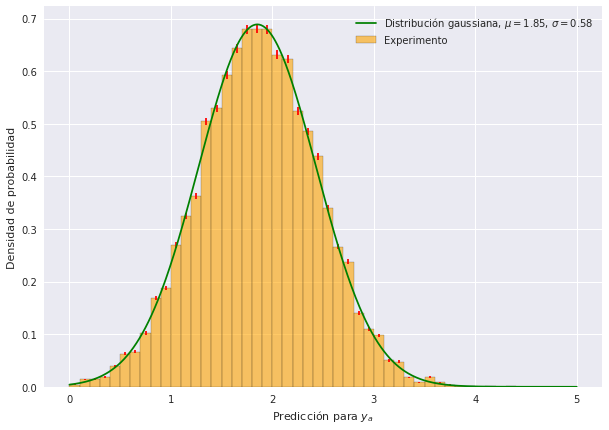

In [50]:
plt.figure(figsize=(10,7))
N, Bins, Patches=plt.hist(y_a,bins=np.linspace(0,5,51),density=True,edgecolor='black',alpha=0);
plt.bar(x=np.linspace(0.05,4.95,50), height=N, width=np.diff(Bins), yerr=np.sqrt(N/10000), edgecolor='black', ecolor="red",color='orange',alpha=0.6, capsize=2,label='Experimento')
plt.plot(np.linspace(0,5,501),curva_teo,'g',label='Distribución gaussiana, $\mu={:.2f}$, $\sigma={:.2f}$'.format(*y_a_teo))
plt.xlabel('Predicción para $y_{a}$');
plt.ylabel('Densidad de probabilidad');
plt.legend();

Los $\{x_{i}\}$ son siempre los mismos. Como los $\{y_{i}\}$ generados tienen distribución gaussiana, la recta que ajuste una dada realización del experimento va a ser tal que minimice un estadístico con distribución Chi cuadrado de n-2 grados de libertad (n=11 en este caso).<br>
Como los $\{y_{i}\}$ son ahora variable aleatoria, entonces los parámetros $a_{1}$ y $a_{2}$ que se obtengan en cada iteración son variable aleatoria también. El histograma que se obtuvo para la predicción del valor de $y_{a}$ en $x_{a}=0.5$ va a tener ditribución gaussiana alrededor del valor esperado para los parámetros estimados previamente, con un 68%CL en el intervalo que antes habíamos calculado y graficado como banda de error; ya que justamente se había explicado a esta banda como lo que podía variar la predicción según cómo pudieran variar los parámetros estimados.

Finalmente, algo que resultaría interesante observar si se quisiera seguir profundizando, sería graficar $a_{2}$ en función de $a_{1}$ para todas las iteraciones en la simulación, y verificar si el 68% de éstos valores caen dentro de la elipse de covarianza dada por la matriz $M$ ya calculada.